In [9]:
import pandas as pd
import numpy as np

In [10]:
AAB = pd.read_csv("mean_shaps_AAB.csv")
AGF = pd.read_csv("mean_shaps_AGF.csv")
BIF = pd.read_csv("mean_shaps_BIF.csv")
FCK = pd.read_csv("mean_shaps_FCK.csv")
FCM = pd.read_csv("mean_shaps_FCM.csv")
FCN = pd.read_csv("mean_shaps_FCN.csv")
LYN = pd.read_csv("mean_shaps_LYN.csv")
RFC = pd.read_csv("mean_shaps_RFC.csv")
SIF = pd.read_csv("mean_shaps_SIF.csv")
SJE = pd.read_csv("mean_shaps_SJE.csv")
VB = pd.read_csv("mean_shaps_VB.csv")
VFF = pd.read_csv("mean_shaps_VFF.csv")

In [11]:
all_dfs = [AAB, AGF, BIF, FCK, FCM, FCN, RFC, SIF, SJE, VB, VFF, LYN]
combined_df = pd.concat(all_dfs)
mean_shap_df = combined_df.groupby('player').mean().reset_index()

In [12]:
combined_df

,player,shap_importance
0,VFFplayer_4,0.435468
1,VFFplayer_16,0.411138
2,VFFplayer_24,0.351764
3,VFFplayer_2,0.344903
4,SJEplayer_12,0.316172
...,...,...
66,VBplayer_59,0.000000
67,RFCplayer_30,0.000000
68,LYNplayer_11,0.000000
69,VBplayer_11,0.000000


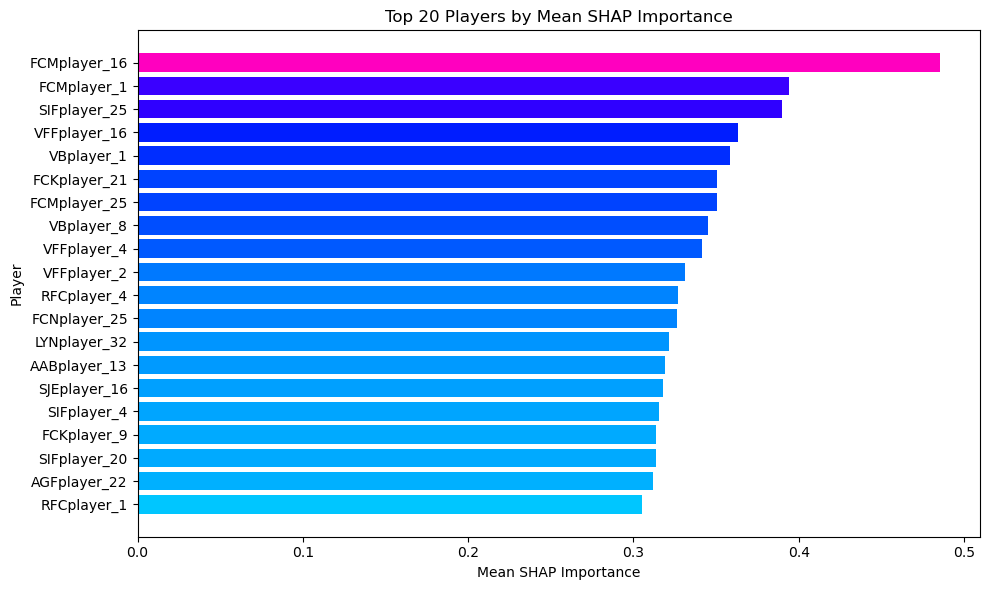

In [30]:
import matplotlib.pyplot as plt

top20 = mean_shap_df.sort_values('shap_importance', ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top20['player'], top20['shap_importance'], color='skyblue')
plt.xlabel('Mean SHAP Importance')
plt.ylabel('Player')
plt.title('Top 20 Players by Mean SHAP Importance')
plt.gca().invert_yaxis()
bars = plt.barh(top20['player'], top20['shap_importance'], color=plt.cm.gist_rainbow(top20['shap_importance'] / top20['shap_importance'].max()))
plt.tight_layout()
plt.show()